In [1]:
import os
# running from Root directory
os.chdir("..")

In [2]:
from motif_search_main import load_network_from_args
from utils.export_import import import_results
from utils.logs import log_motif_criteria_args, log_motif_results, log_sub_graph_args, log_randomizer_args, log_motifs_table
from utils.types import MotifCriteriaArgs, MotifType, MotifName, Motif
import matplotlib.pyplot as plt
import networkx as nx
from typing import Union
import numpy as np
from collections import defaultdict
import collections
from networkx.algorithms import isomorphism
from isomorphic.isomorphic import get_sub_graph_mapping_to_motif, create_base_motif, IsomorphicMotifMatch


In [17]:
iso_matcher = IsomorphicMotifMatch(k=4, polarity_options=[], allow_self_loops=False)

In [19]:
isomorphic_mapping = iso_matcher.isomorphic_mapping
isomorphic_graphs = iso_matcher.isomorphic_graphs
# motifs = [create_base_motif(k, 3) for k in isomorphic_graphs.keys()]

k = 4
isomorphic_mapping, isomorphic_graphs = generate_isomorphic_k_sub_graphs(k=k)
motifs = []
for sub_id in isomorphic_graphs:
    motifs.append(create_base_motif(sub_id, k))


In [20]:
len(motifs)

13

In [6]:
three_sub_graphs_mapping = {
    14: "mutual out",
    38: "feed forward",
    46: "regulating mutual",
    74: "mutual in",
    78: "bi-mutual",
    102: "mutual cascade",
    108: "regulated mutual",
    110: "semi clique",
    6: "fan out",
    12: "cascade",
    36: "fan in",
    98: "feed backward",
    238: "clique"
}

In [24]:
from matplotlib.patches import ArrowStyle 

as_ = ArrowStyle("simple", head_length=1.5, head_width=2.5, tail_width=.4)

def draw_motif(motif: Motif, ax):
    ax.axis('off')
    
    # title = f'{motif.name.value}-{motif.id}' if motif.name.value != MotifName.na else motif.id
    # title = three_sub_graphs_mapping[motif.id]
    title = 'bi 
    ax.set_title(title, fontsize=10, fontweight='heavy')

    graph = nx.DiGraph(motif.role_pattern)
    pos = nx.circular_layout(graph)
    nx.draw_networkx(graph, pos, ax=ax,  arrowsize=5, arrowstyle=as_) #, node_color='#9467bd')
    
    if motif.polarity:
        for role, pol in zip(motif.role_pattern, motif.polarity):
            s,t = role
            graph[s][t]['polarity'] = 'c' if pol == 'complex' else pol

        edge_labels=dict([((u,v,),d['polarity']) for u,v,d in graph.edges(data=True)])
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax, font_color='k', font_weight='bold', label_pos=0.3)


In [8]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2))

# draw_motif(create_base_motif(14, 3), ax)
# draw_motif(create_base_motif(44, 3), ax)

# fig.savefig("44.svg")

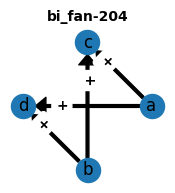

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2))
# pol_motif = create_base_motif(78, 3)
pol_motif = create_base_motif(204, 4)
pol_motif.polarity = ['+', '+', '+', '+']
draw_motif(pol_motif, ax)
# fig.savefig("pol_78.svg")

In [10]:
len(motifs[:14])

13

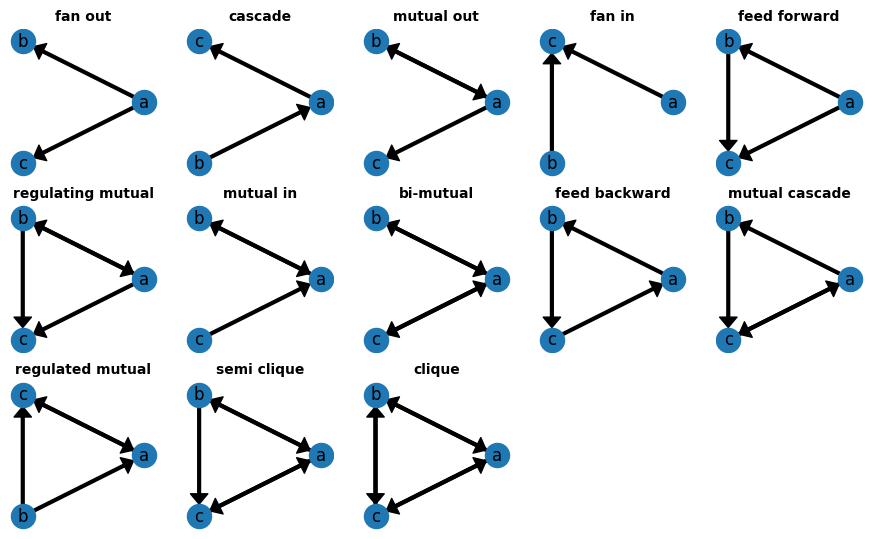

In [14]:
num_of_graphs = 13
cols = 5
rows = 3

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(11, 6.5))

for idx, motif in enumerate(motifs[:14]):  
    col = idx % cols
    row = idx // cols
    draw_motif(motif, ax[row][col])
ax[-1][-1].remove()
ax[-1][-2].remove()
# fig.savefig("k3.svg")

In [12]:
create_base_motif(38, 3).adj_mat

array([[0, 1, 1],
       [0, 0, 1],
       [0, 0, 0]], dtype=int32)

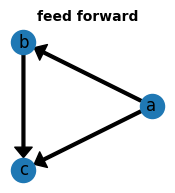

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2))
draw_motif(create_base_motif(38, 3), ax)